<a href="https://colab.research.google.com/github/poorav03/Data-Science-Project/blob/main/AHPP_Data_Anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Phase!**

**1. Importing necessary libraries and dataset**

In [ ]:
#Data Analysis Phase
# Main aim is to understand more about the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
pd.pandas.set_option('display.max_columns',None)
dataset = pd.read_csv('/content/drive/My Drive/DataScience/Advance_House_Price_Prediction/train.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Printing shape**

In [ ]:
#print the shape of the dataset
print(dataset.shape)
print(dataset.head())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            

**3. Finding NA cols and it's Percentage**

Missing values column: 18
LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 59.726  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


<ipython-input-8-3bb13ba5909c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index,y=missing_values.values,palette="viridis")


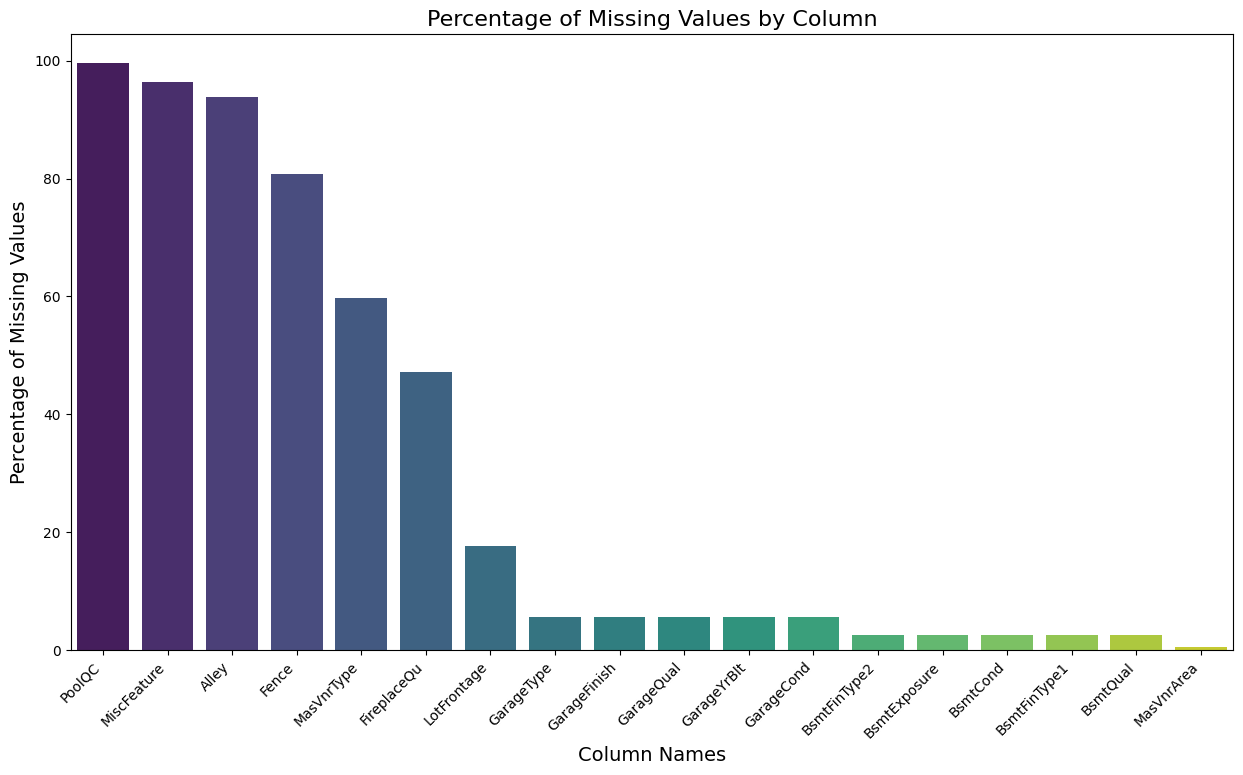

In [ ]:
# Find out how many missing values are there
# 1: make a list of the features which has more than one missing value in a col
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

# Print the feature name and percentage of missing values
print("Missing values column:",len(features_with_na))
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean()*100,4),' % missing values')

missing_values = np.round(dataset[features_with_na].isnull().mean()*100,4)
missing_values = missing_values.sort_values(ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(x=missing_values.index,y=missing_values.values,palette="viridis")
plt.title("Percentage of Missing Values by Column",fontsize=16)

plt.xlabel("Column Names",fontsize=14)
plt.ylabel("Percentage of Missing Values",fontsize=14)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.show()
#Here With the relation between the missing values and the dependent variable is clearly visible So
#We need to replace these nan values with something meaningful which we will do in the Feature
# Engineering section

**4. Fetching numerical features from the dataset and Year cols**

In [ ]:
# Counting numerical features:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes!='O'] # 'O' denotes the string or object data type
print("Number of numerical variables: ",len(numerical_features))
print(dataset[numerical_features].head())


# Temporal Variables(Eg: Datetime Variables)
# From the Dataset we have 4 year variables. We have extract information from the datetime
# variables like no of years or no of days. One example in this specific scenario can be difference in
# years between the year the house was built and the year the house was sold, We will be
# performing this analysis in the Feature Engineering which is the next video.

year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print(year_feature)
#Printing the year feature
for feature in year_feature:
    print(feature,dataset[feature].unique())


Number of numerical variables:  38
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlr

**5. Checking dependancy of salePrice and Year**

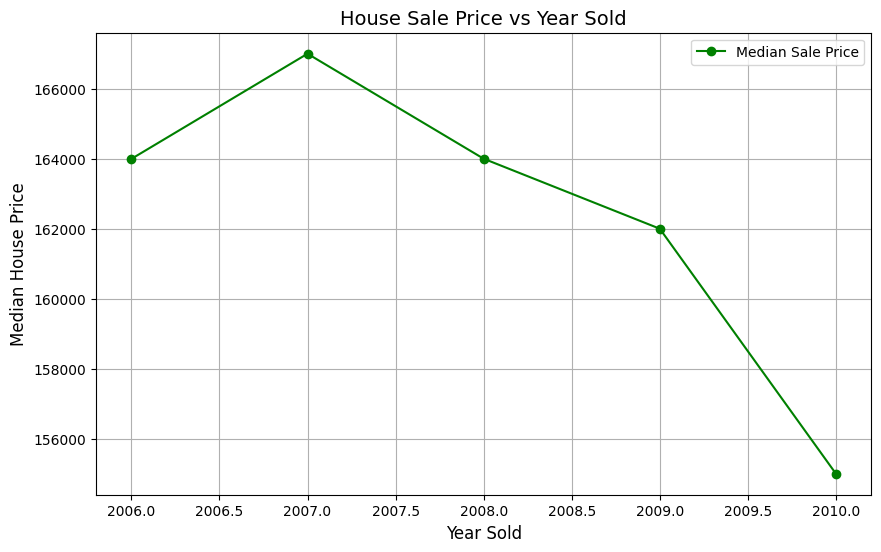

In [ ]:
# Let's analyze the temporal datetime variables
# we will check weather there is a relation between year  the house is sold and salePrice

# Group by the year sold and compute median SalePrice
sale_price_year = dataset.groupby('YrSold')['SalePrice'].median()

# Line plot: Median SalePrice vs Year of Sale
plt.figure(figsize=(10, 6))
plt.plot(sale_price_year.index, sale_price_year.values, marker='o', linestyle='-', color='g', label='Median Sale Price')
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Median House Price', fontsize=12)
plt.title('House Sale Price vs Year Sold', fontsize=14)
plt.grid()
plt.legend()
plt.show()

**6. Difference of years and SalePrice**

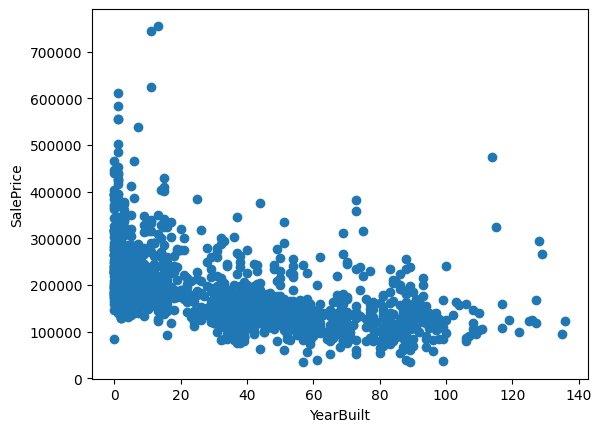

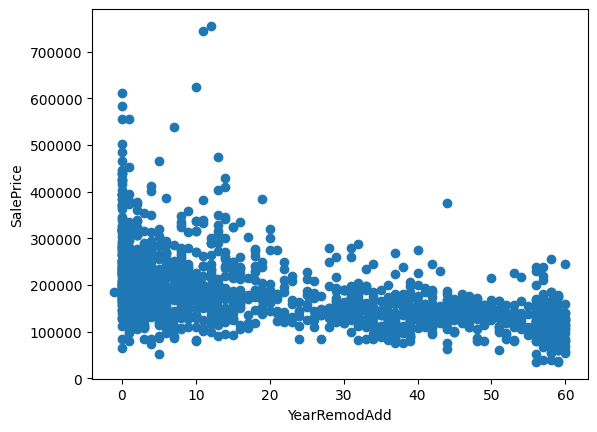

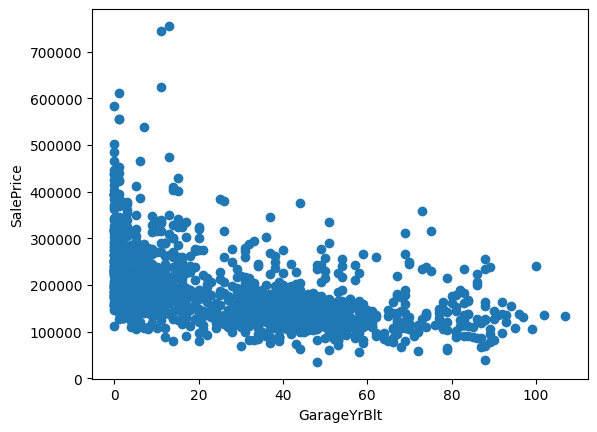

In [ ]:
# Now we will compare the difference between all years features with saleprice
for feature in year_feature:
    if(feature!='YrSold'):
        data = dataset.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


**7. Fetching Discrete Features from numerical features**

In [ ]:
# Segregating discrete features
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: ",len(discrete_features))
print(discrete_features)

Discrete Variables Count:  17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


**8. Relationship between discrete features and SalePrice**

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


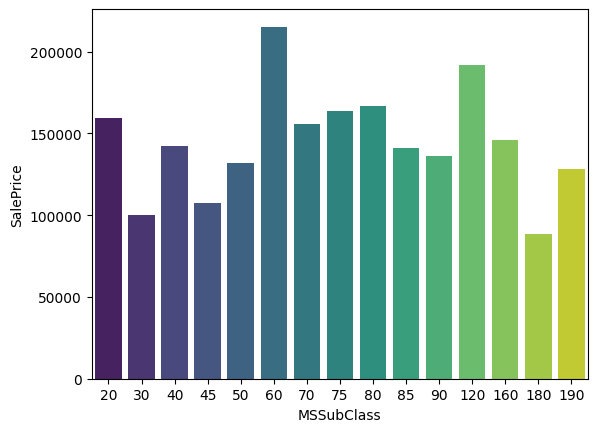

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


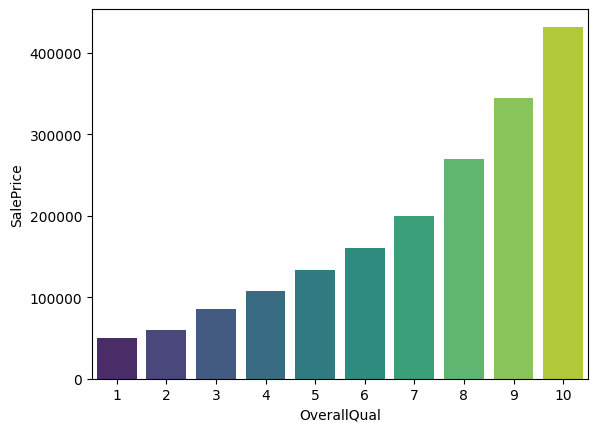

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


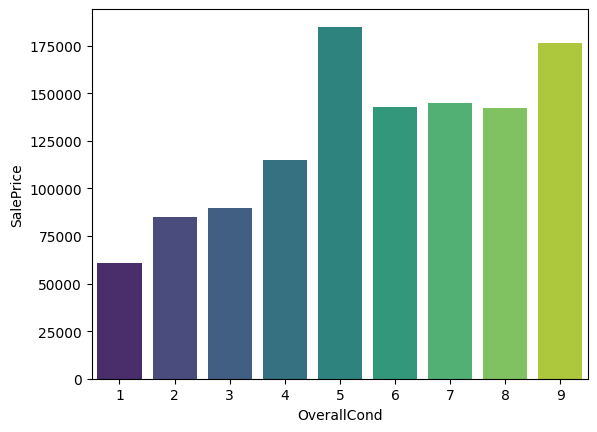

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


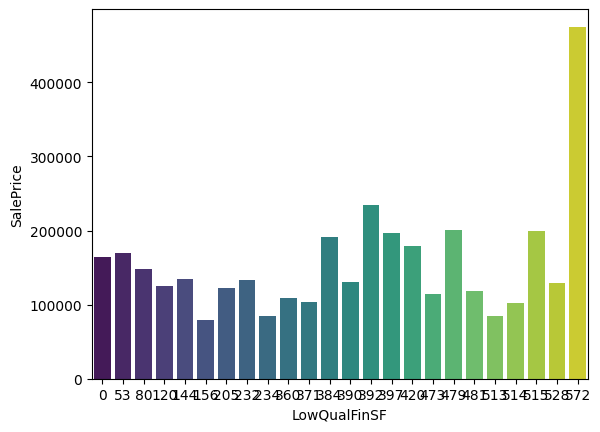

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


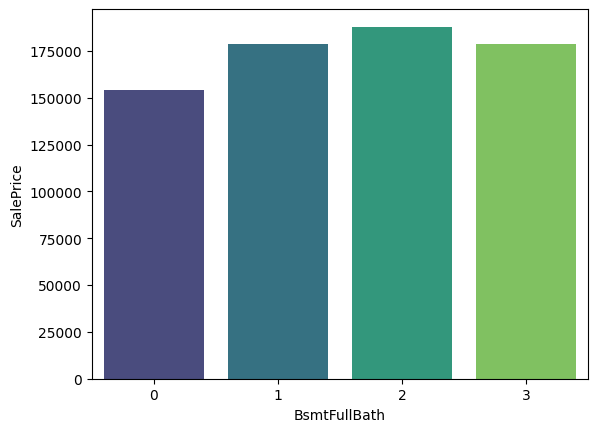

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


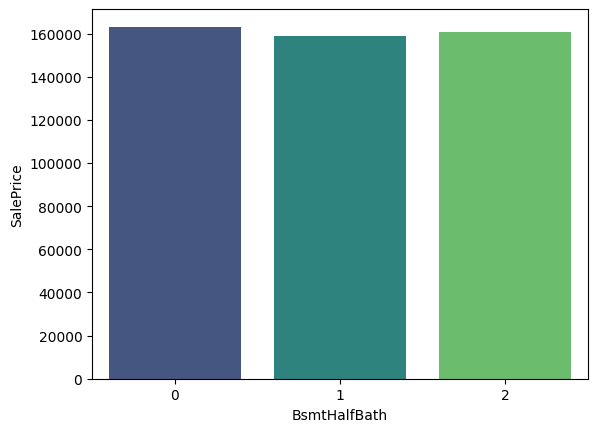

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


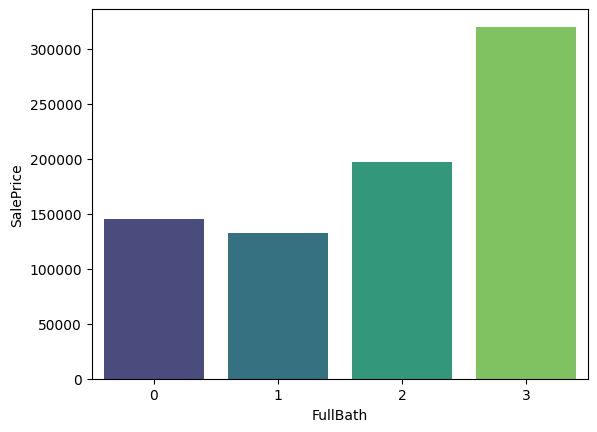

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


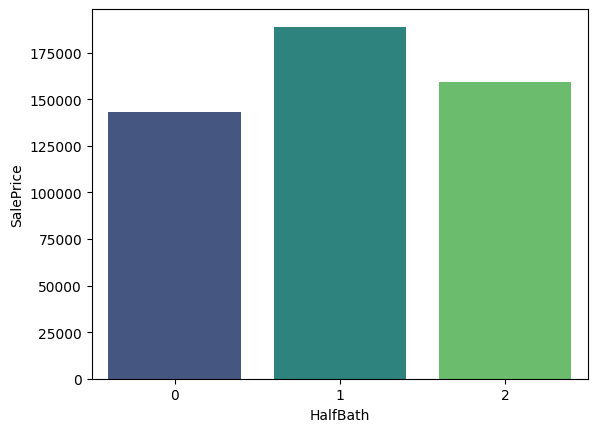

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


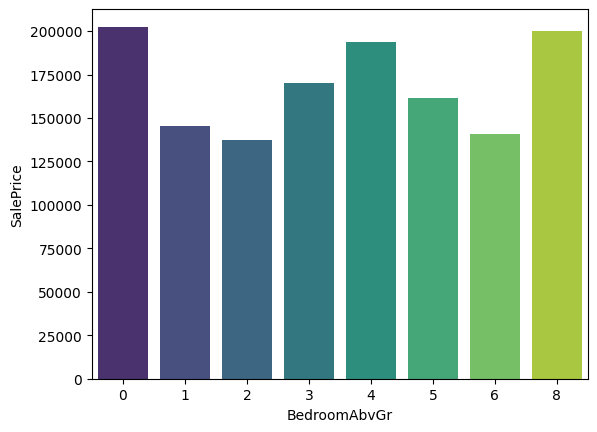

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


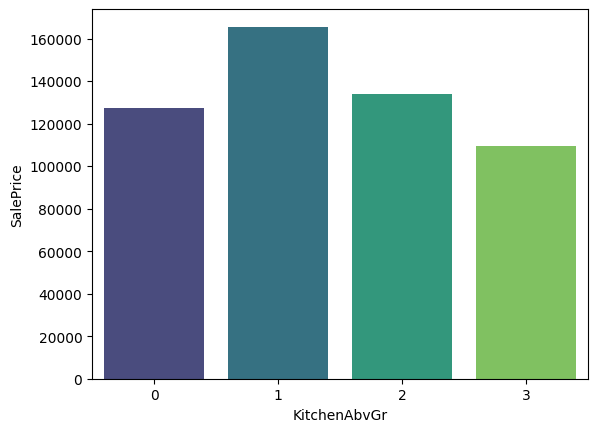

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


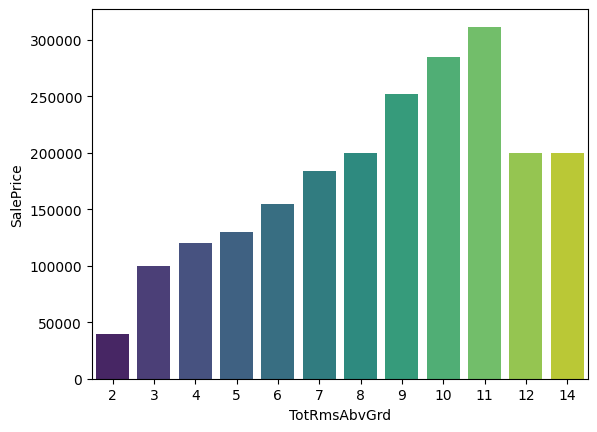

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


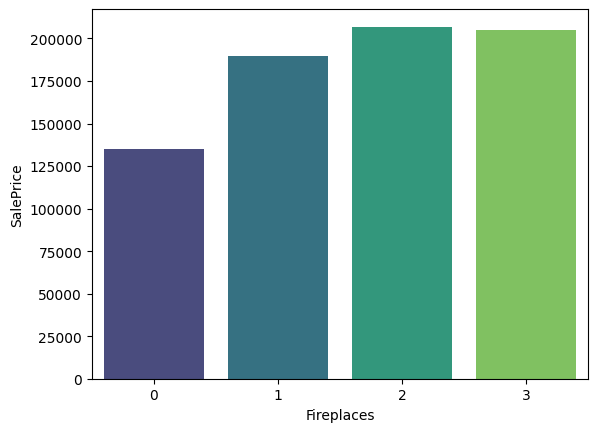

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


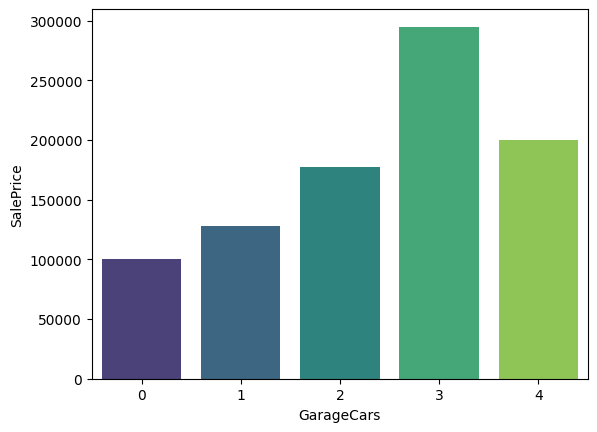

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


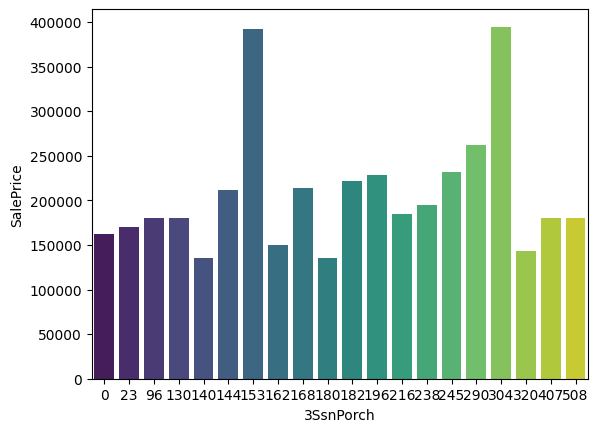

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


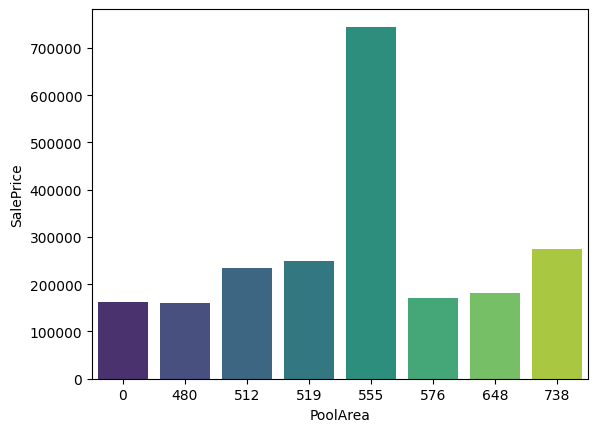

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


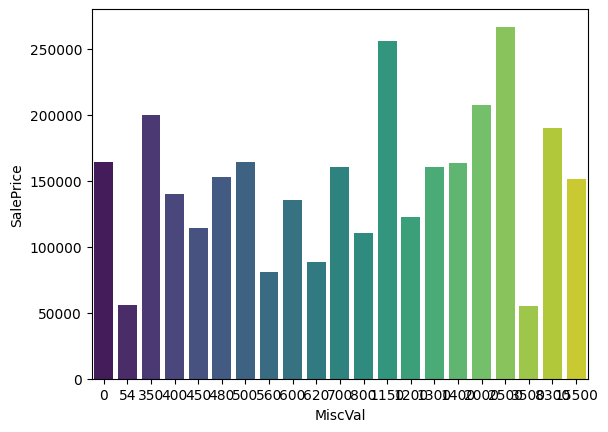

<ipython-input-18-912b43fa9fd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")


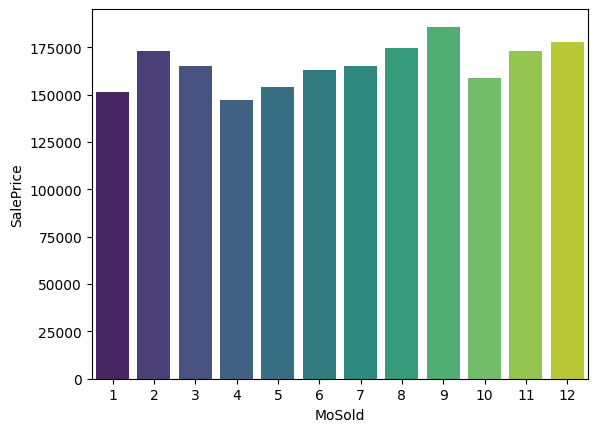

In [ ]:
# Finding relationship between discrete features and salePrice

for feature in discrete_features:
    data=dataset.copy()
    grouped_data= data.groupby(feature)['SalePrice'].median().reset_index()
    sns.barplot(data=grouped_data,x=feature,y='SalePrice',palette="viridis")
    plt.show()



**9. Fetching Continuous features from numerical features**

Continuous feature count:  20
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'SalePrice']


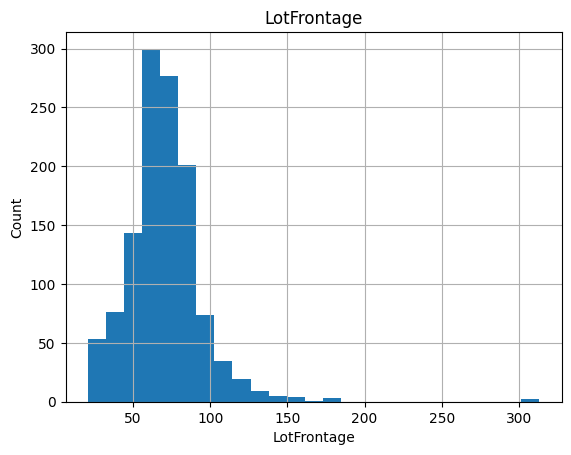

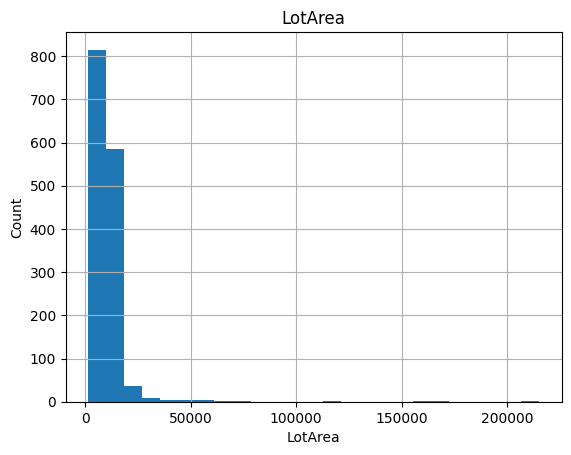

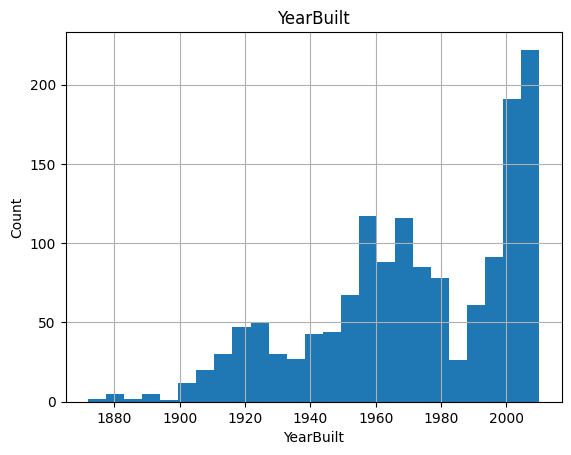

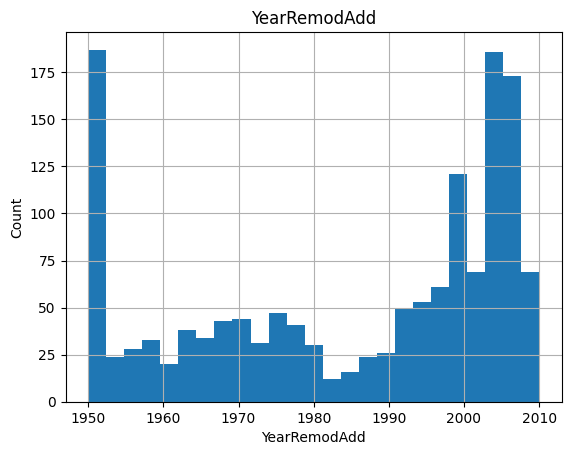

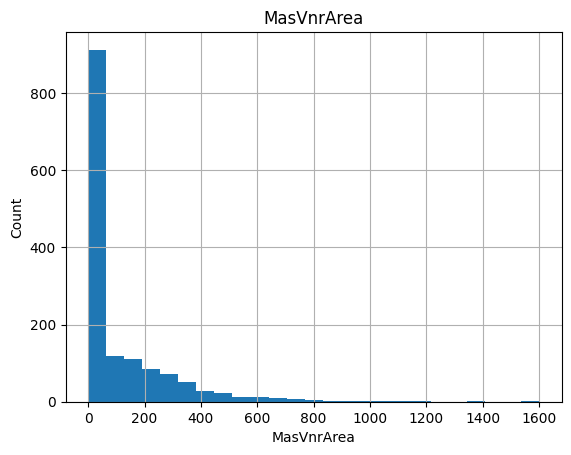

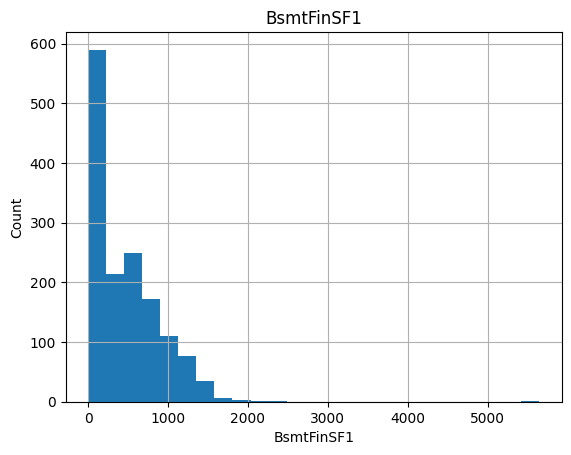

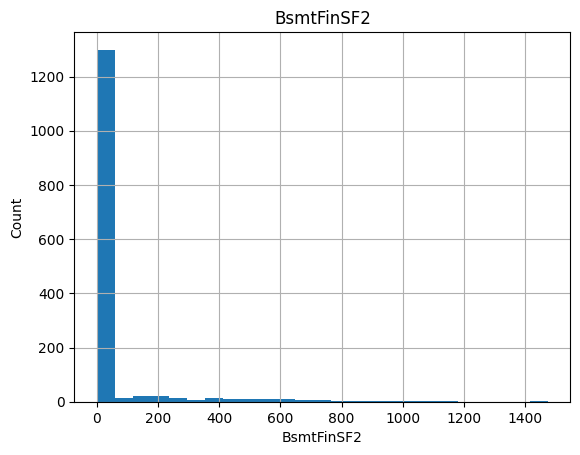

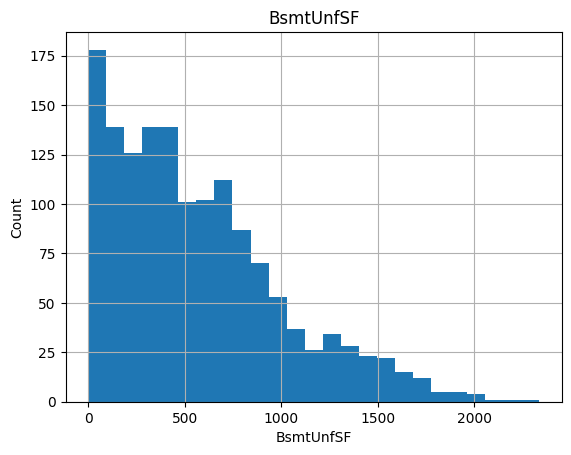

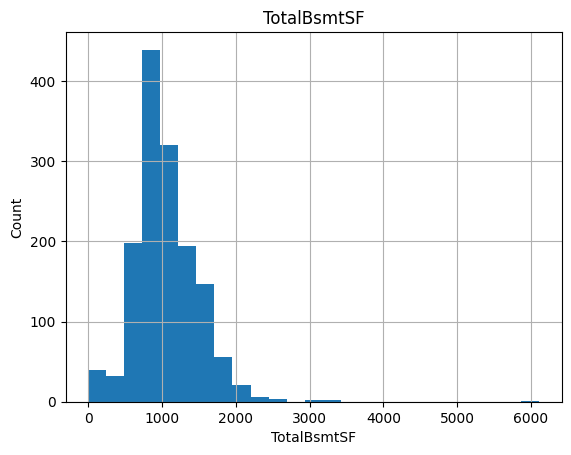

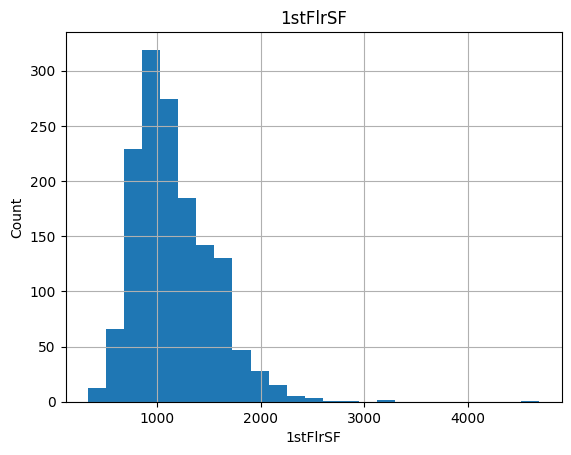

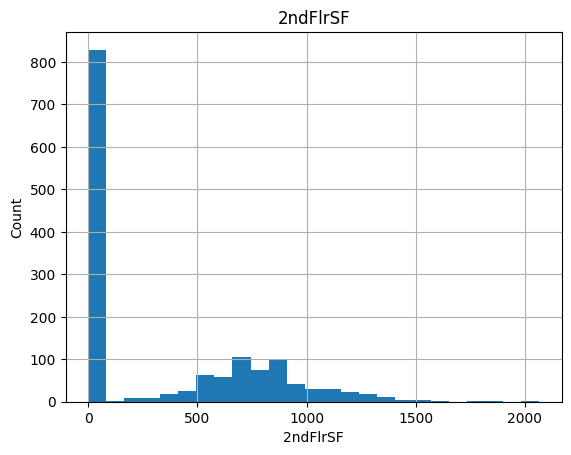

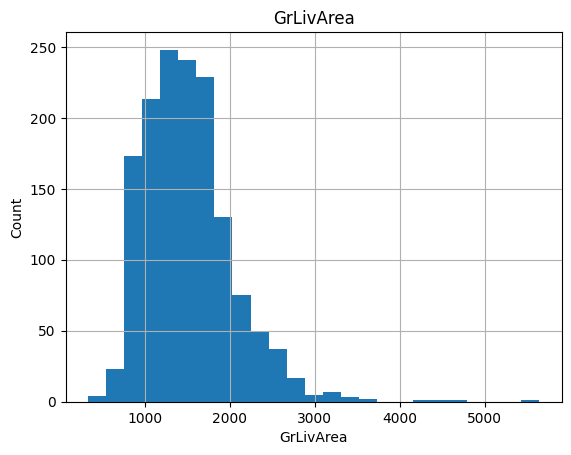

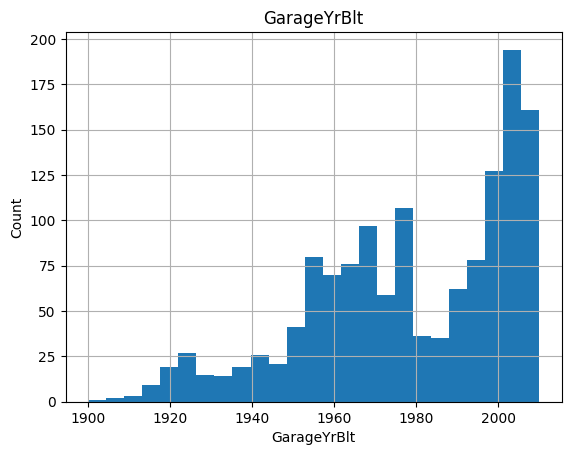

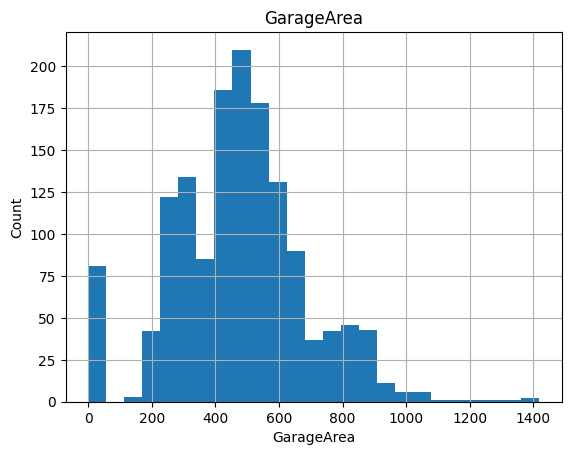

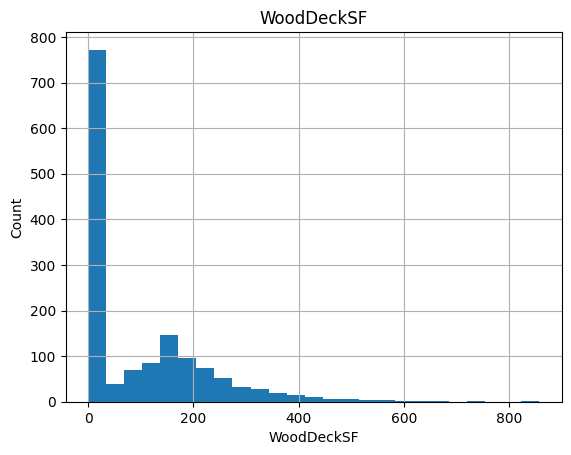

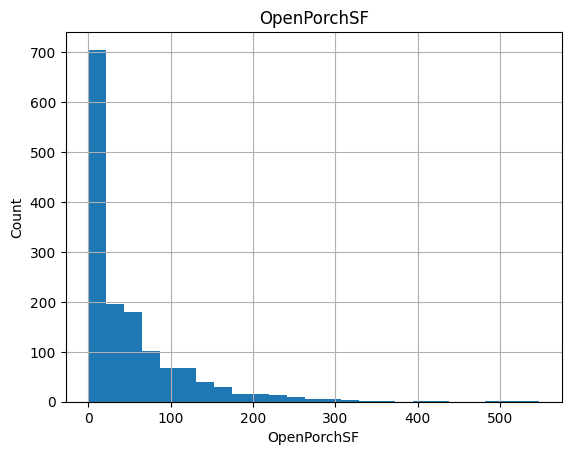

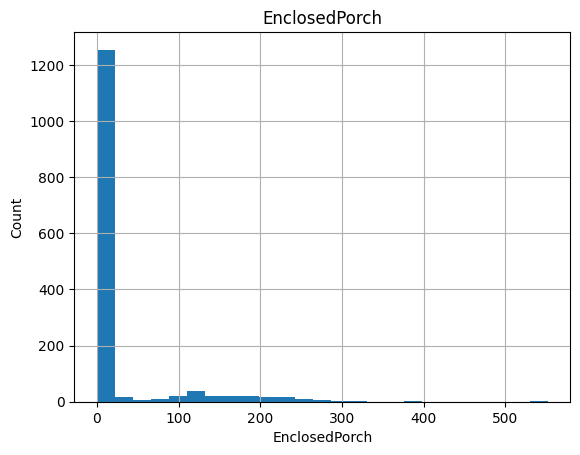

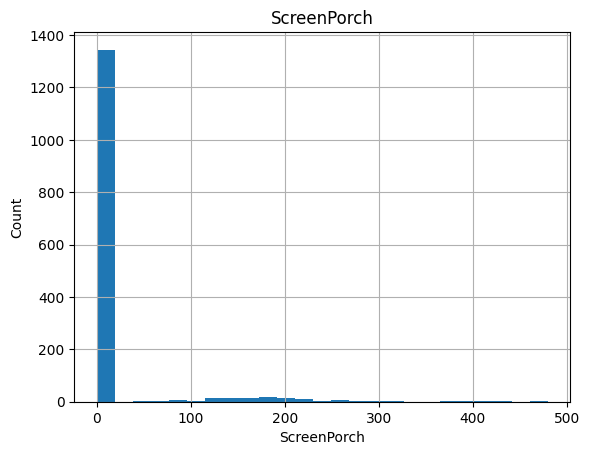

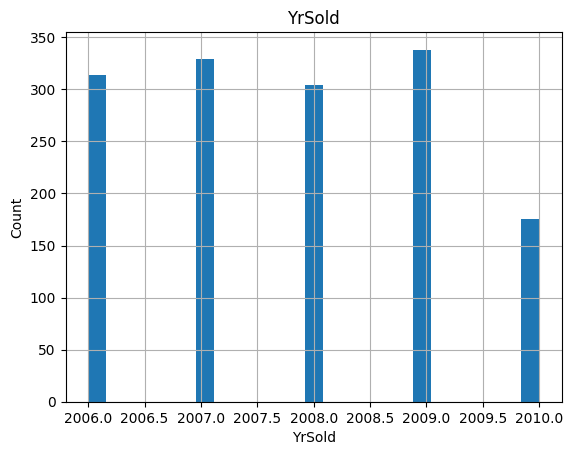

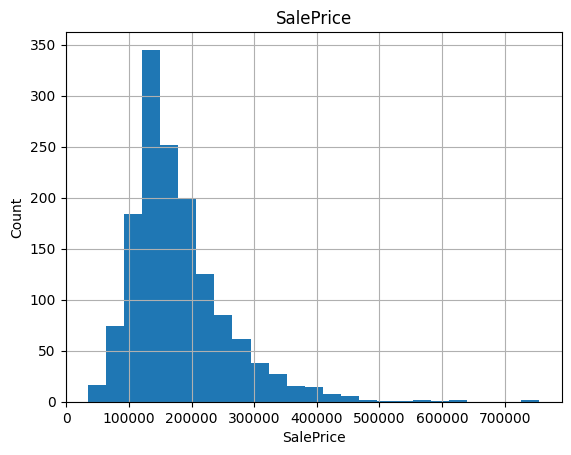

In [ ]:

# Segregating the continuous features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features+['Id']]
print("Continuous feature count: ",len(continuous_features))
print(continuous_features)
for feature in continuous_features:
    data = dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Some features have gaussian distribution but others have skewed data, so we will do normalization (non gaussian to gaussian distribution)
# That will be helpful for linear model prediction

**10. Normalizing the data using log**

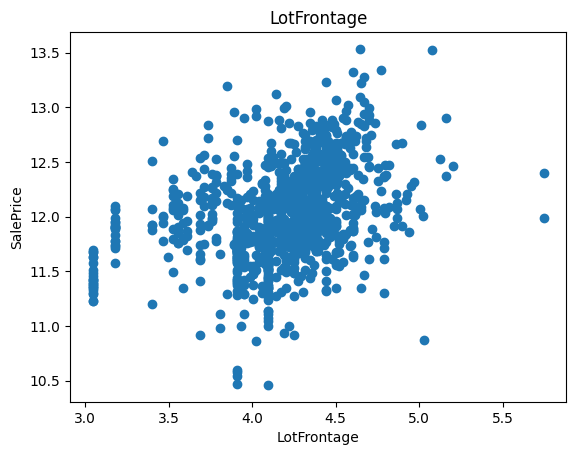

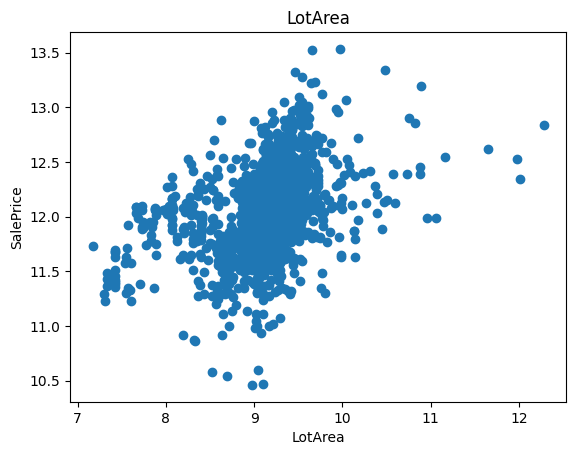

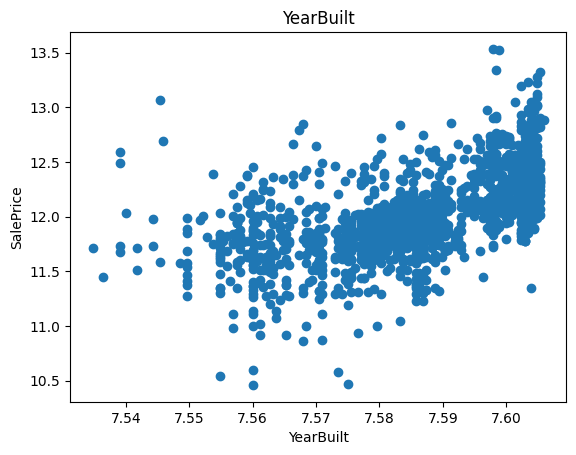

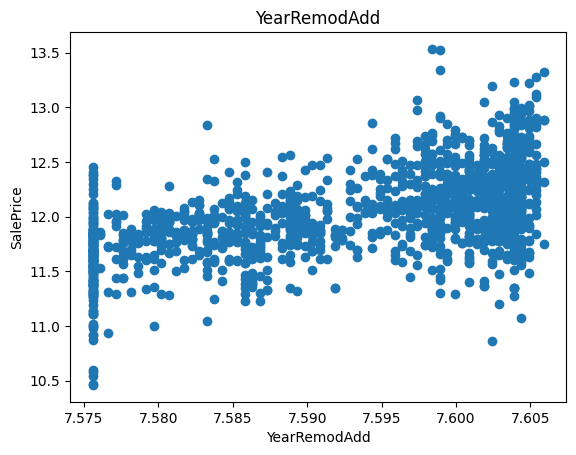

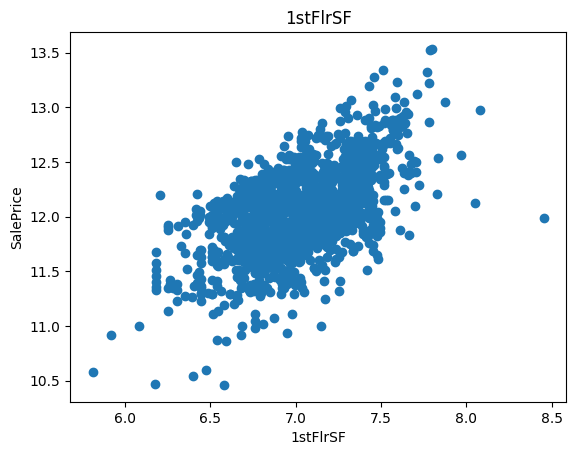

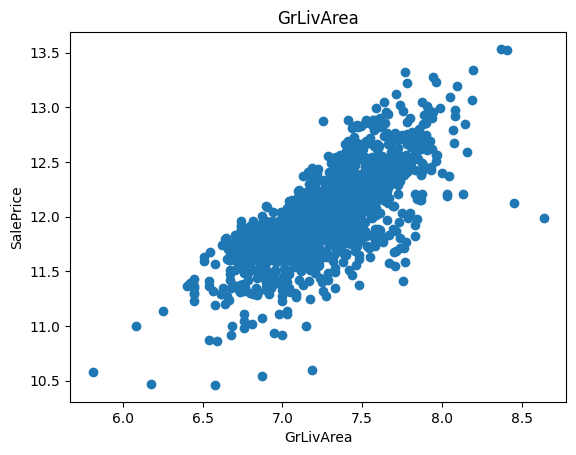

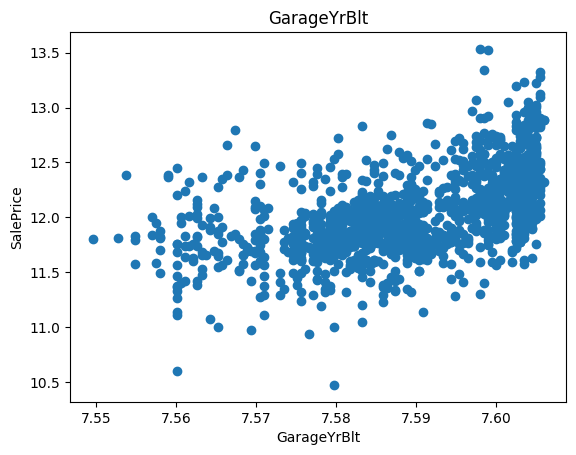

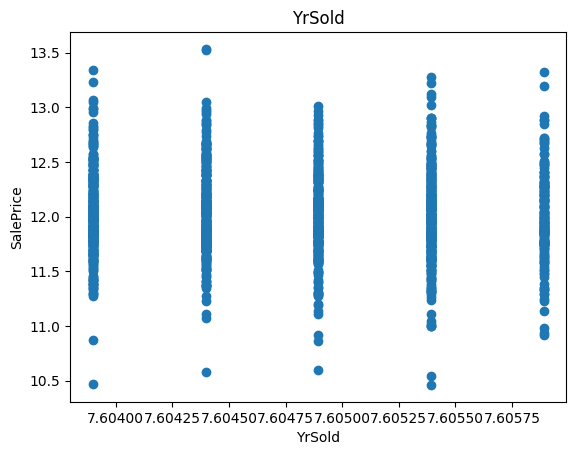

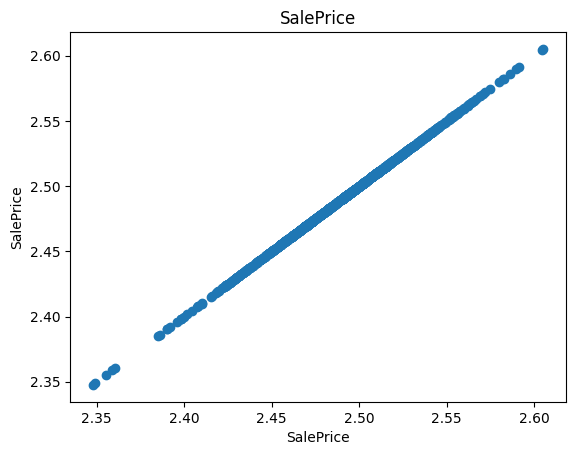

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'SalePrice']


In [ ]:
for feature in continuous_features:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

print(continuous_features)

**11. Checking Outliers**

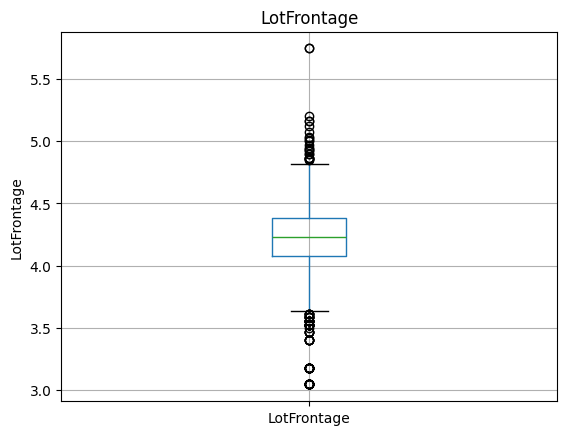

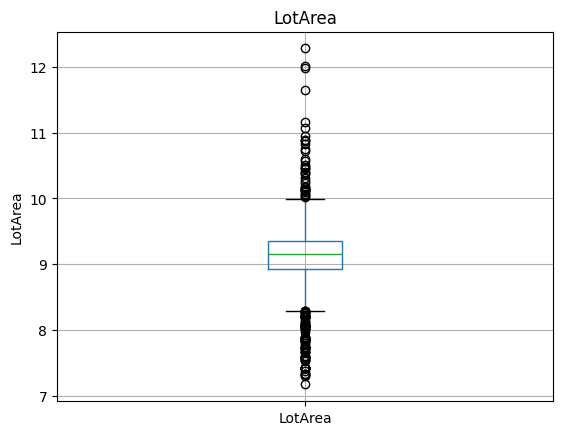

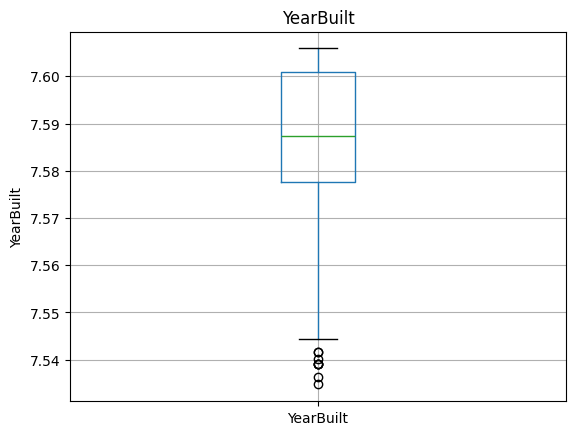

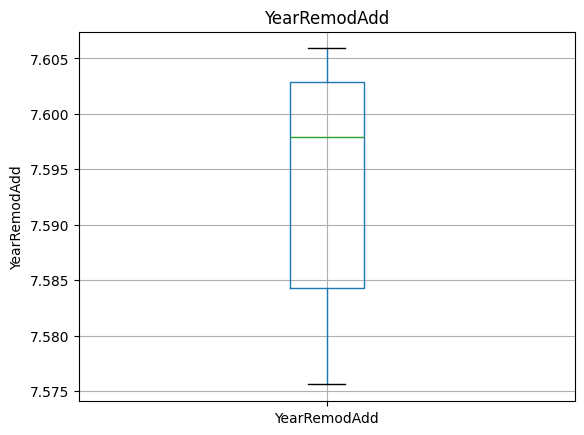

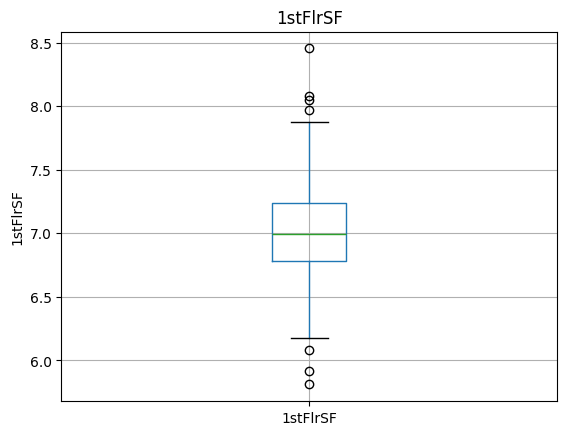

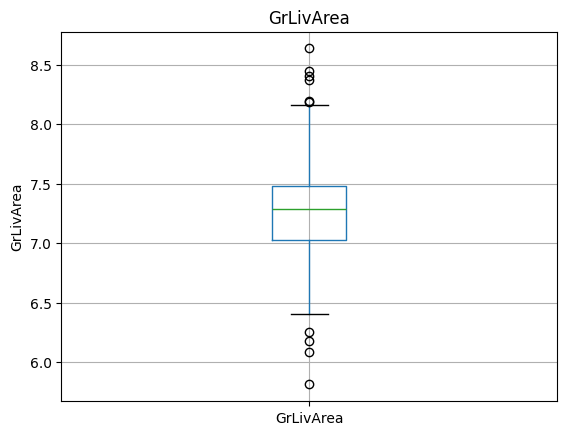

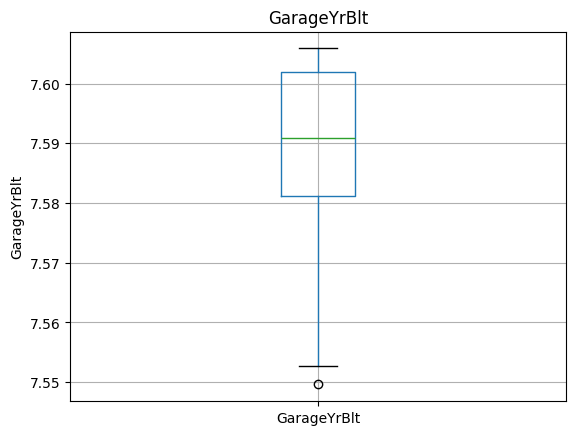

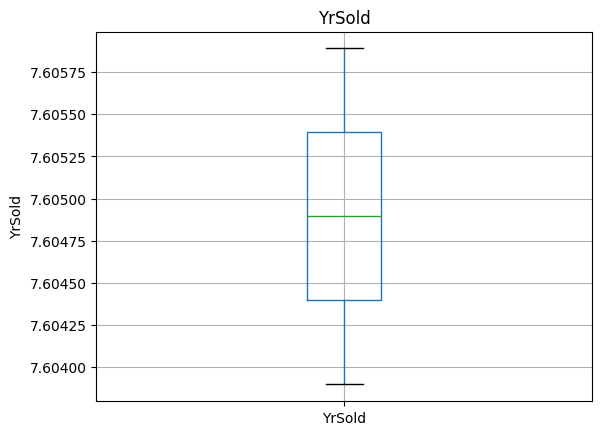

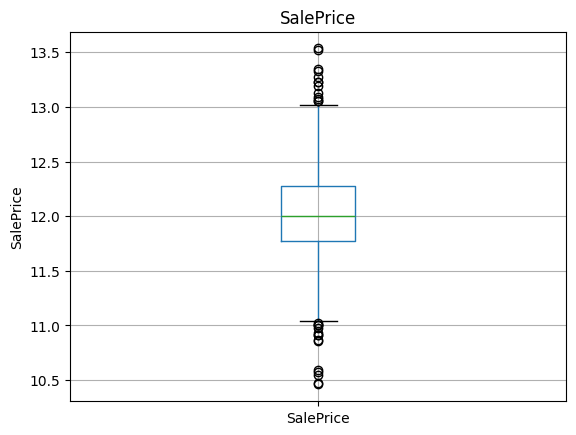

In [ ]:
for feature in continuous_features:
  data = dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


**12. Finding Categorical Variables**

In [ ]:
categorical_feature = [feature for feature in dataset.columns if data[feature].dtypes=='O']
print("Categorical Variables Count: ",len(categorical_feature))
print(categorical_feature)
dataset[categorical_feature].head()

Categorical Variables Count:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**13. Printing all unique attributes for each Categorical feature**

In [ ]:
for feature in categorical_feature:
  print('The feature is {} and number of categories are {} which are {}'.format(feature,len(dataset[feature].unique()),dataset[feature].unique()))

The feature is MSZoning and number of categories are 5 which are ['RL' 'RM' 'C (all)' 'FV' 'RH']
The feature is Street and number of categories are 2 which are ['Pave' 'Grvl']
The feature is Alley and number of categories are 3 which are [nan 'Grvl' 'Pave']
The feature is LotShape and number of categories are 4 which are ['Reg' 'IR1' 'IR2' 'IR3']
The feature is LandContour and number of categories are 4 which are ['Lvl' 'Bnk' 'Low' 'HLS']
The feature is Utilities and number of categories are 2 which are ['AllPub' 'NoSeWa']
The feature is LotConfig and number of categories are 5 which are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
The feature is LandSlope and number of categories are 3 which are ['Gtl' 'Mod' 'Sev']
The feature is Neighborhood and number of categories are 25 which are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'


**14. Establishing relationship between Categorical feature and dependent variables (SalePrice)**

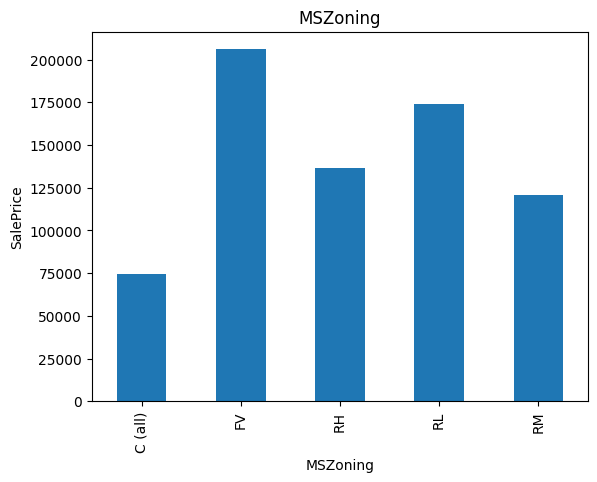

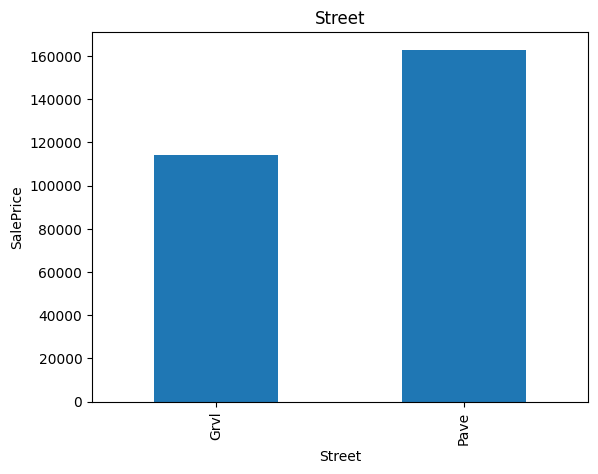

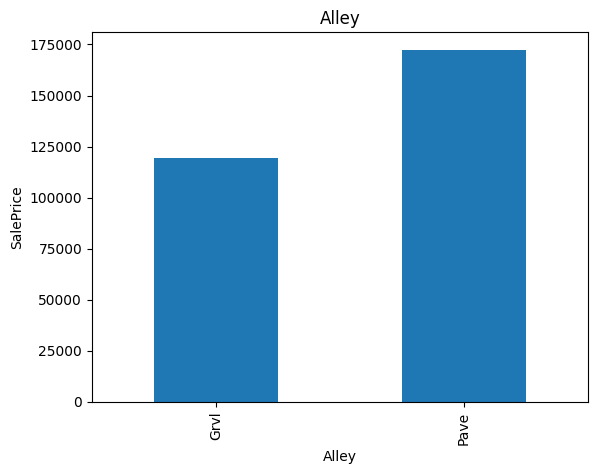

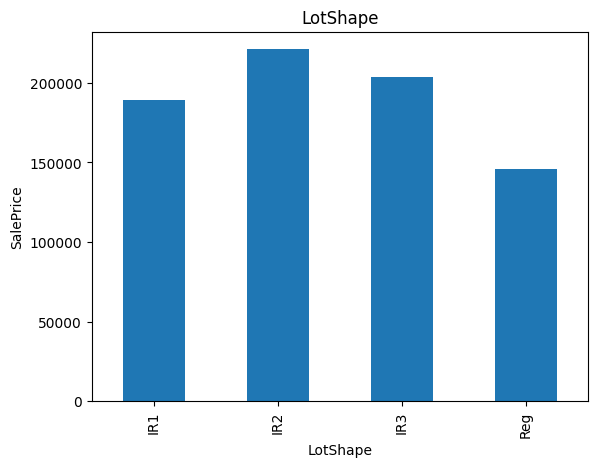

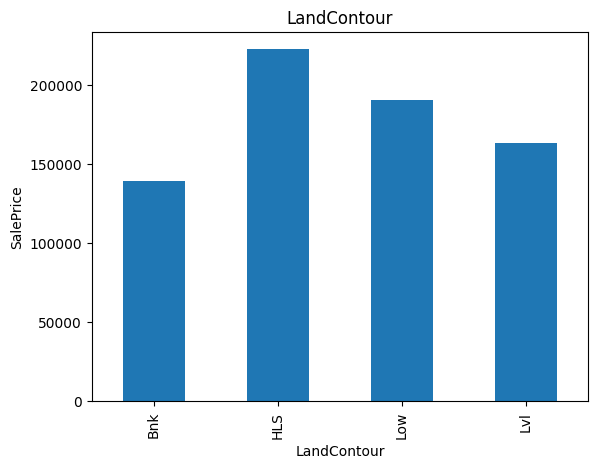

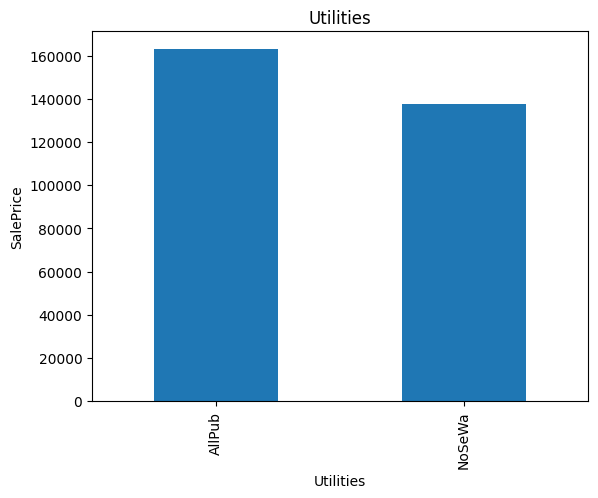

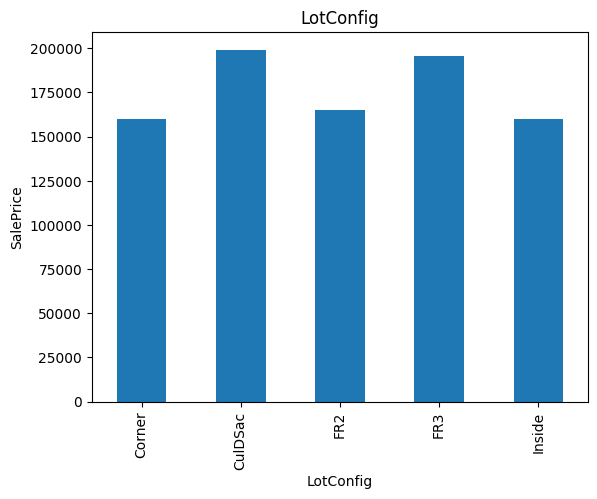

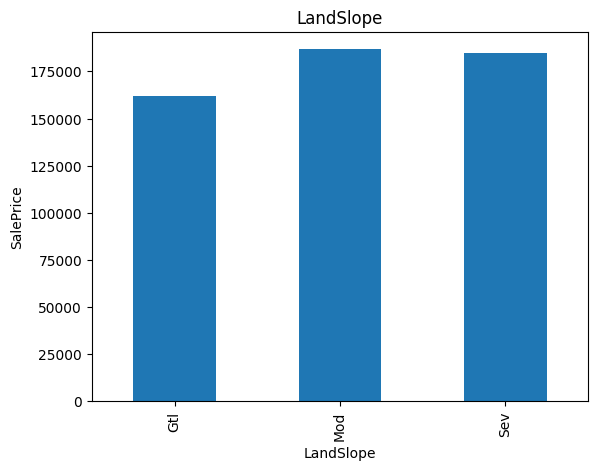

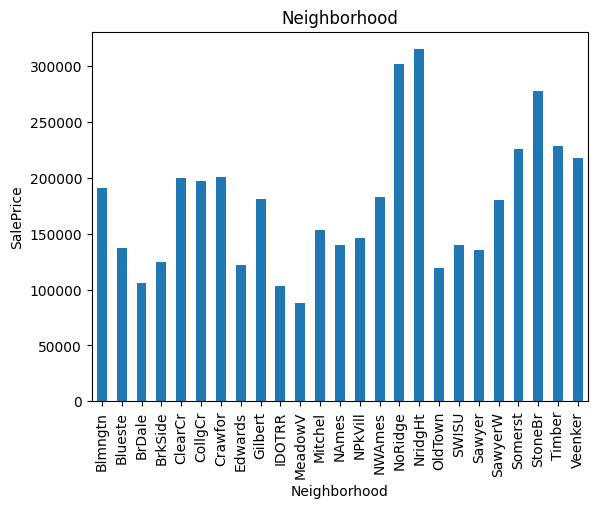

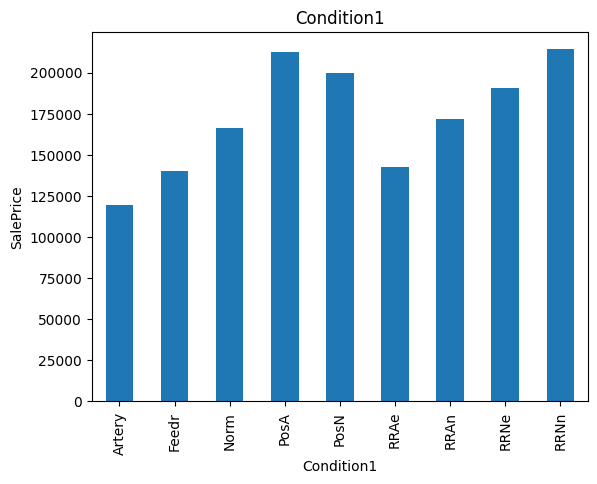

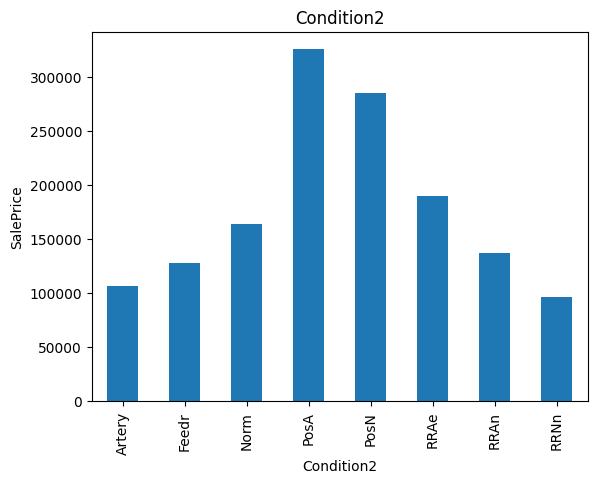

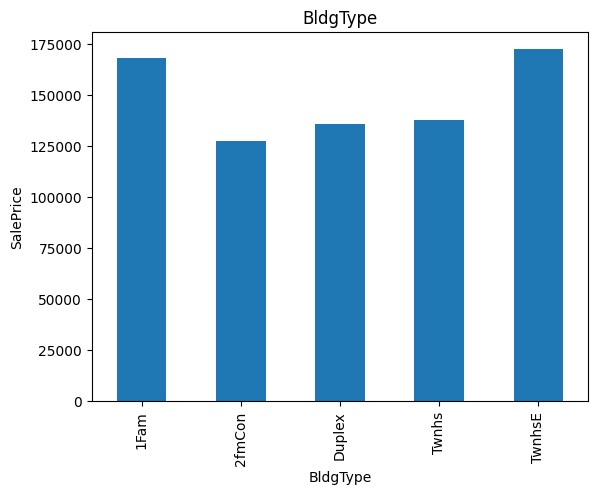

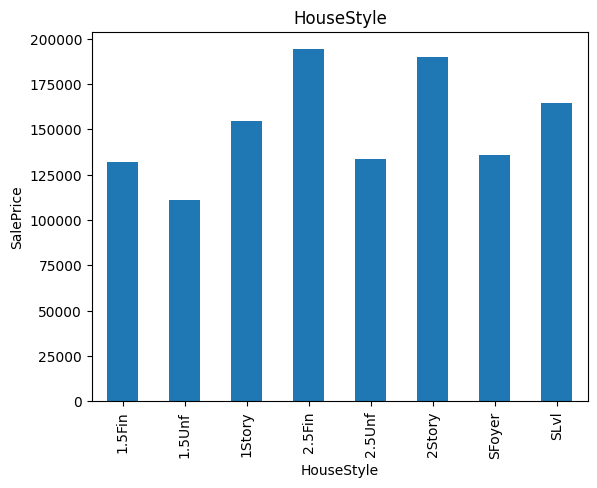

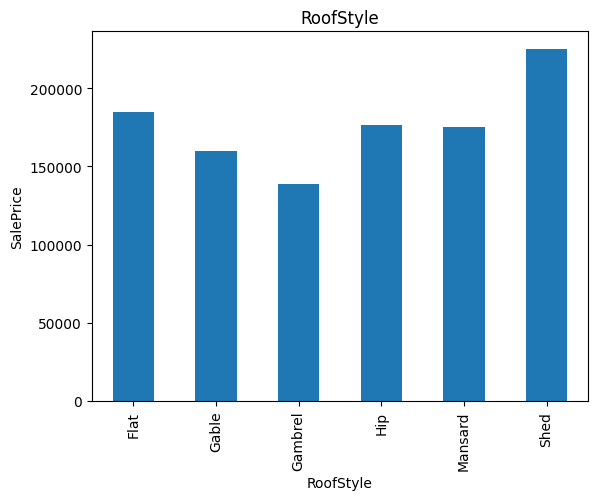

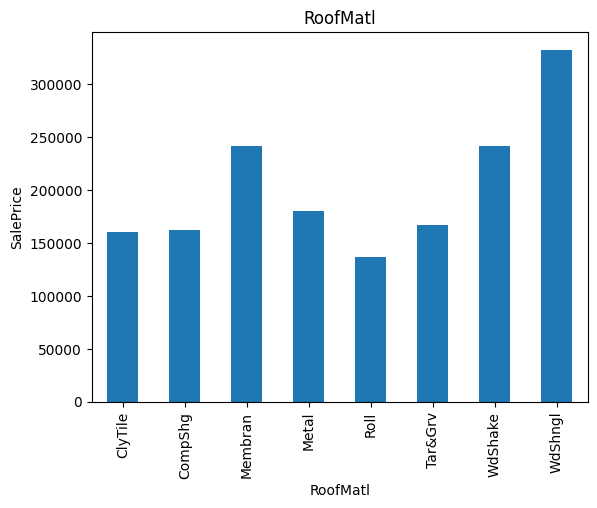

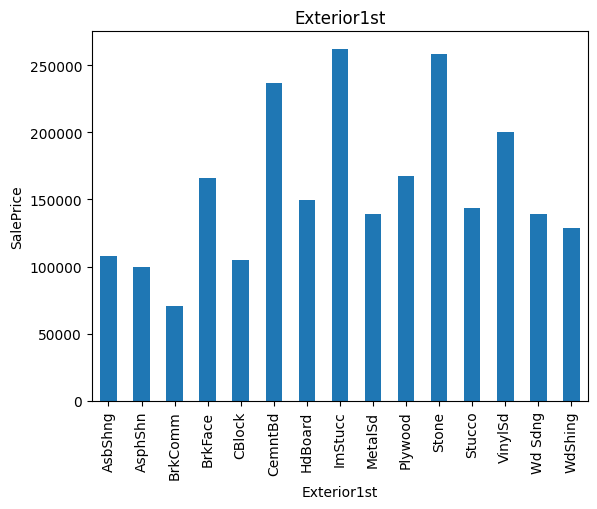

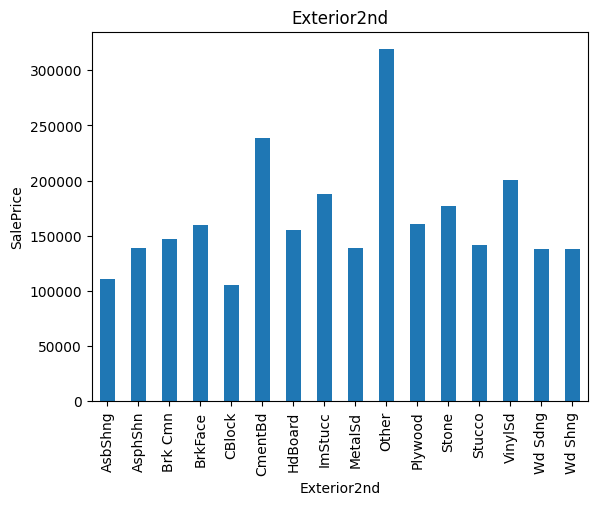

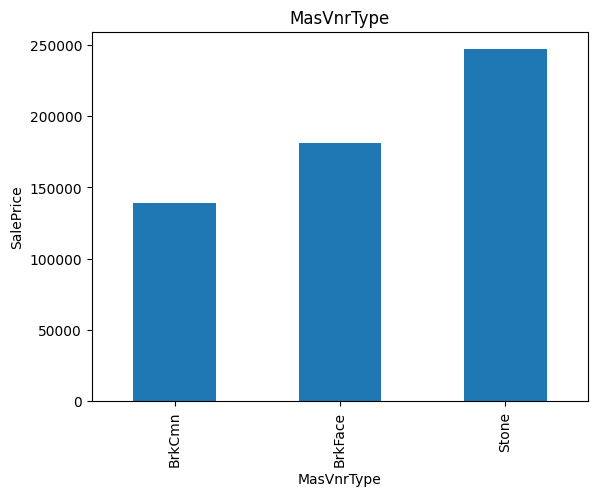

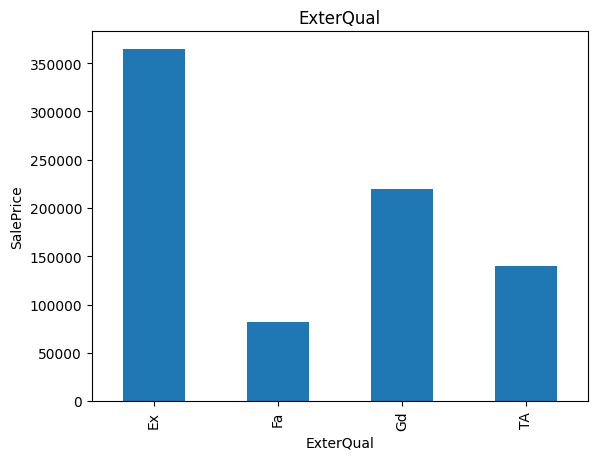

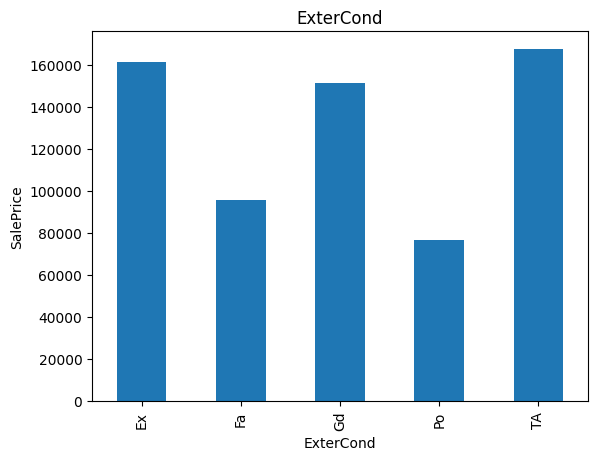

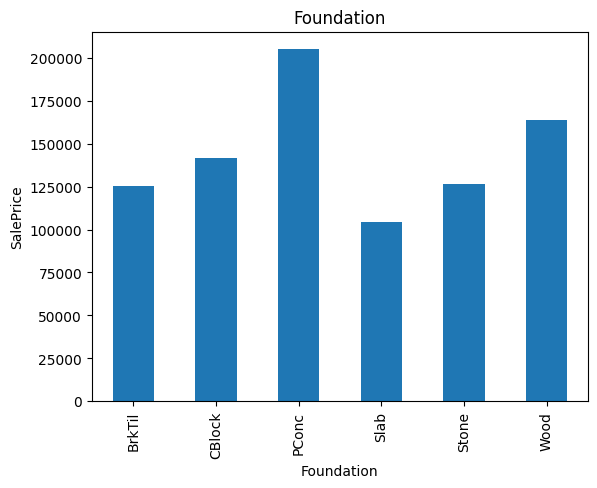

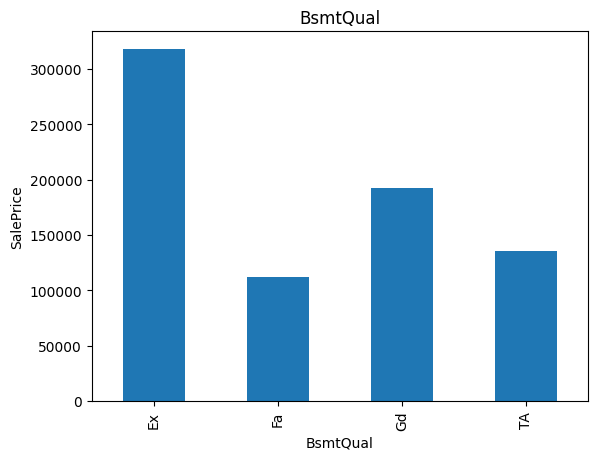

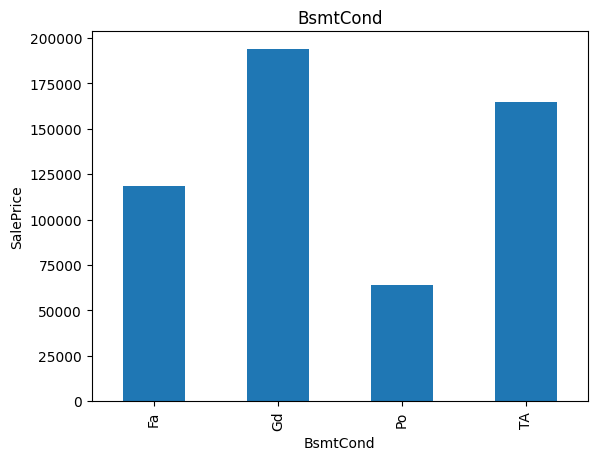

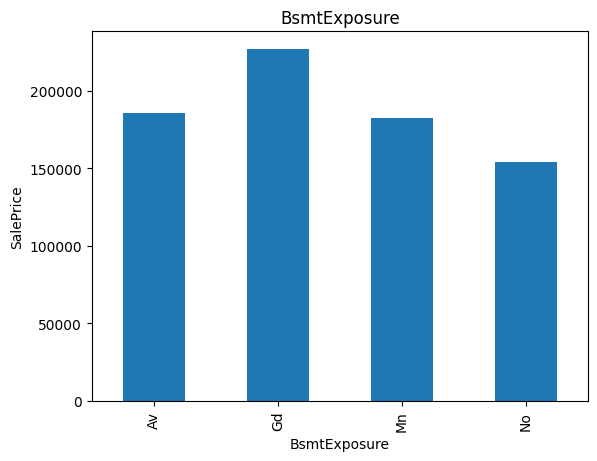

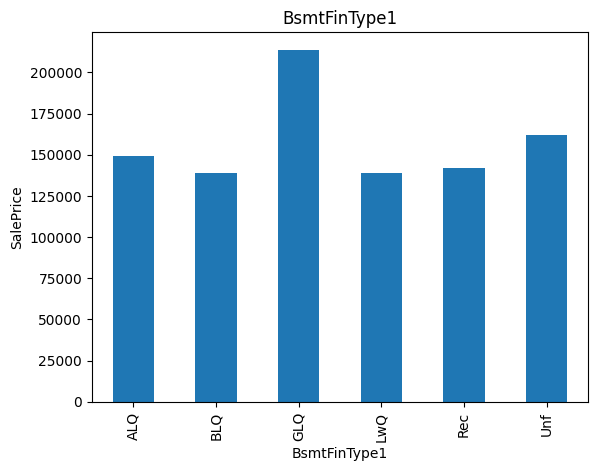

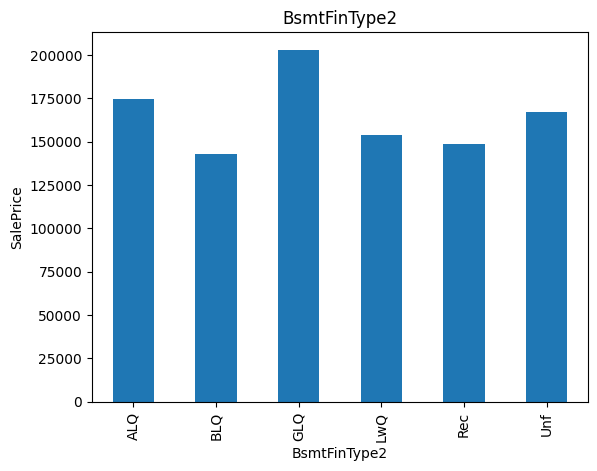

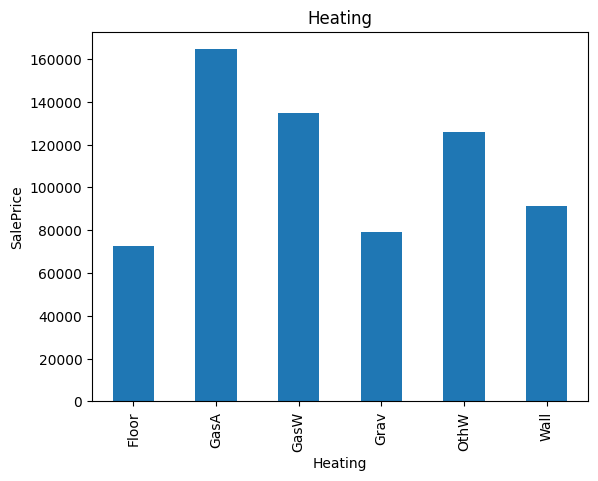

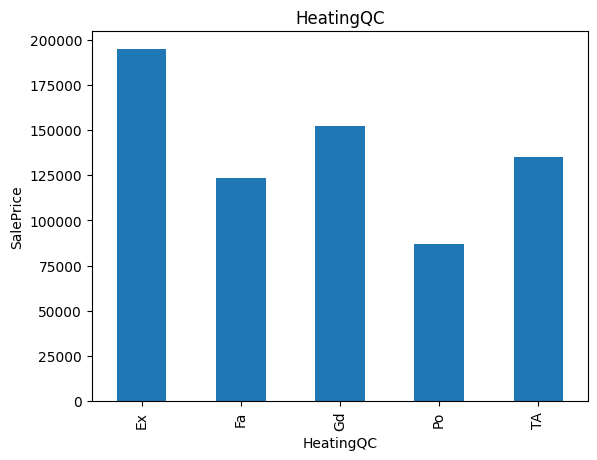

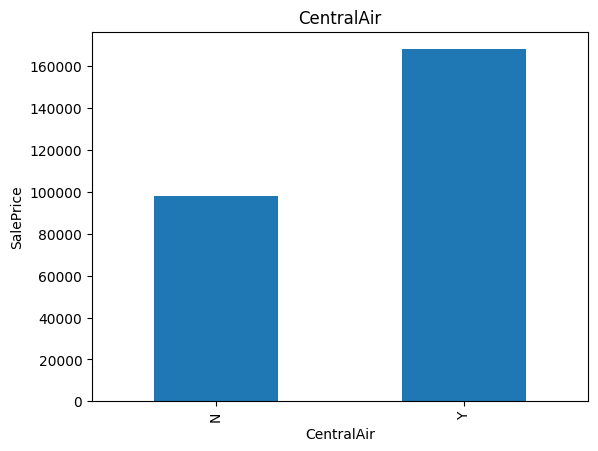

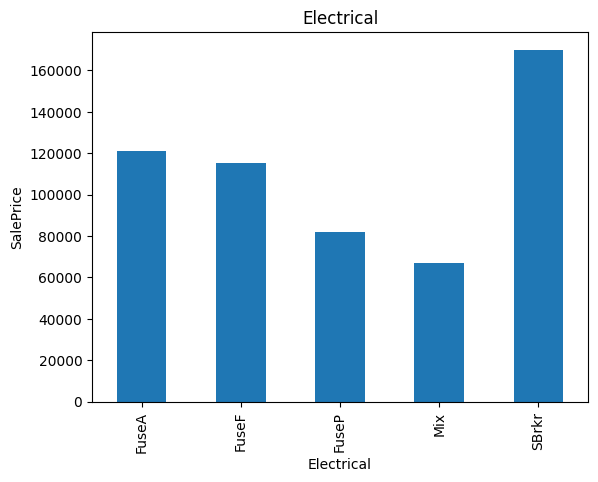

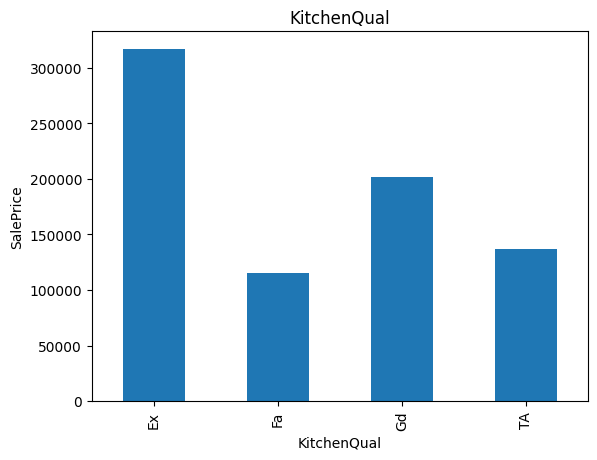

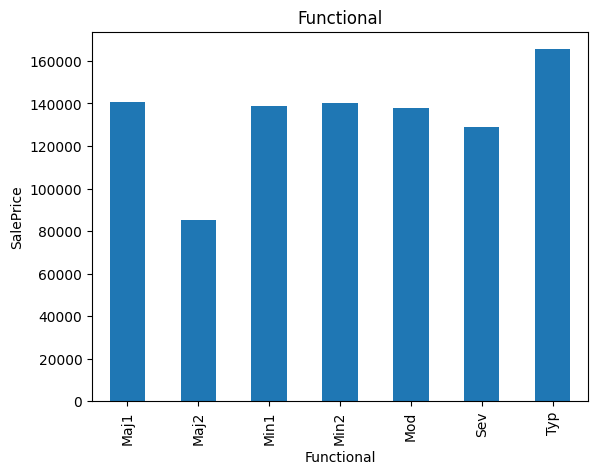

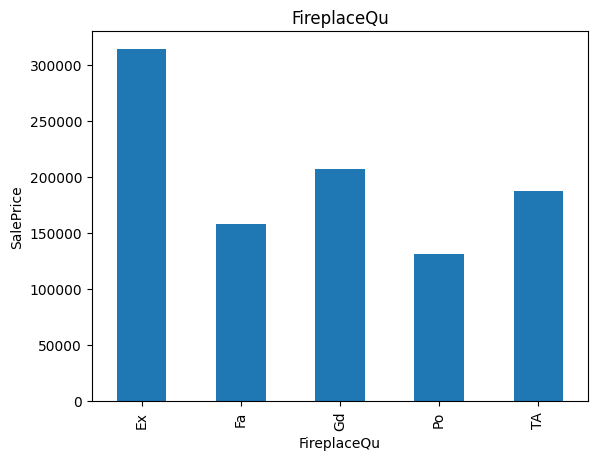

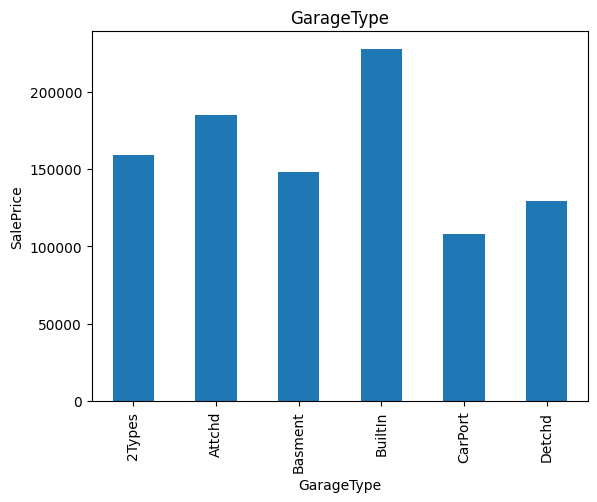

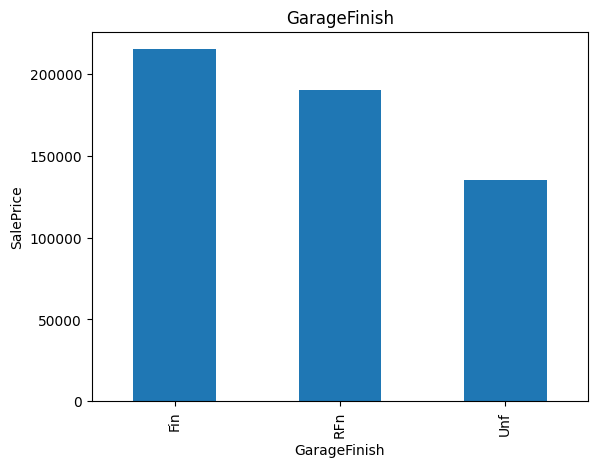

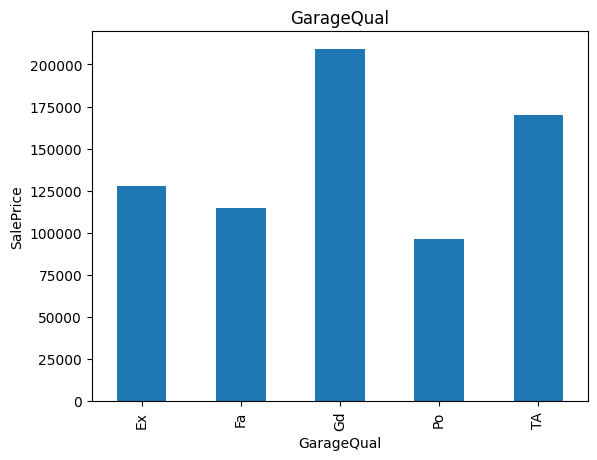

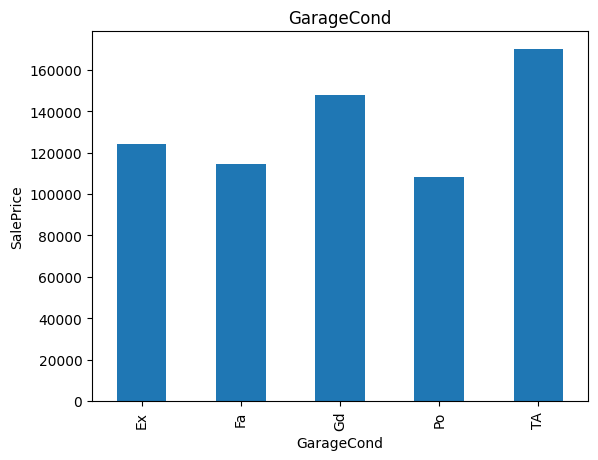

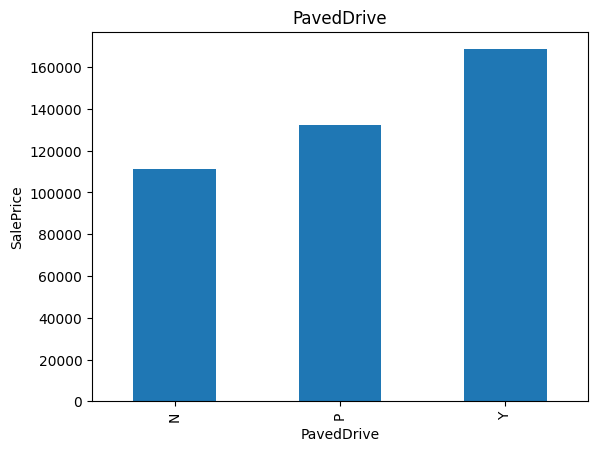

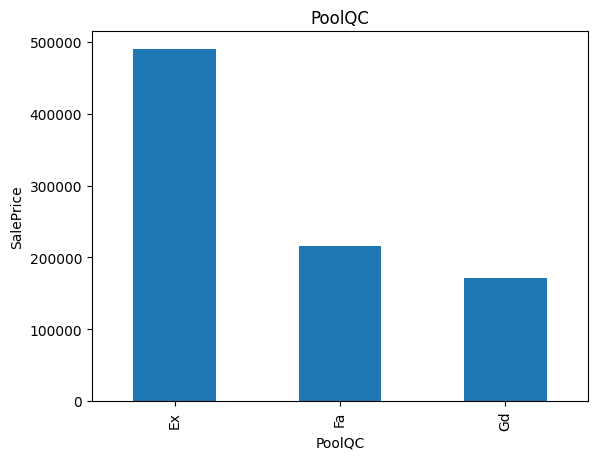

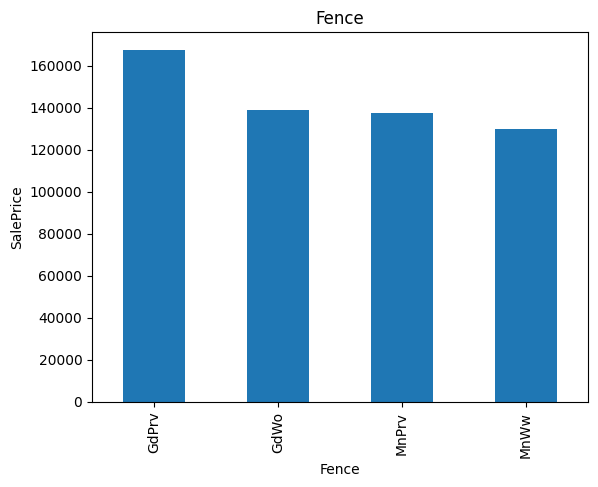

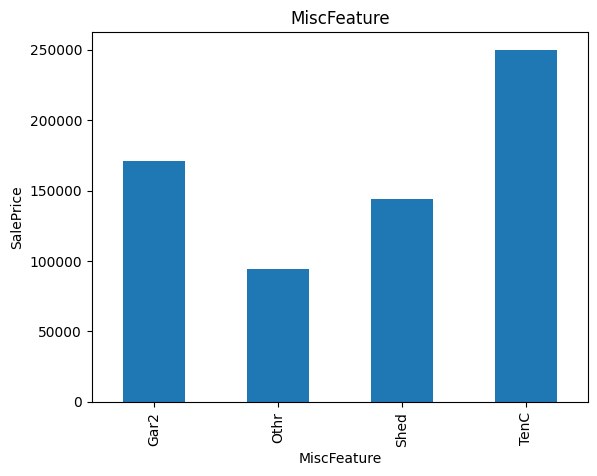

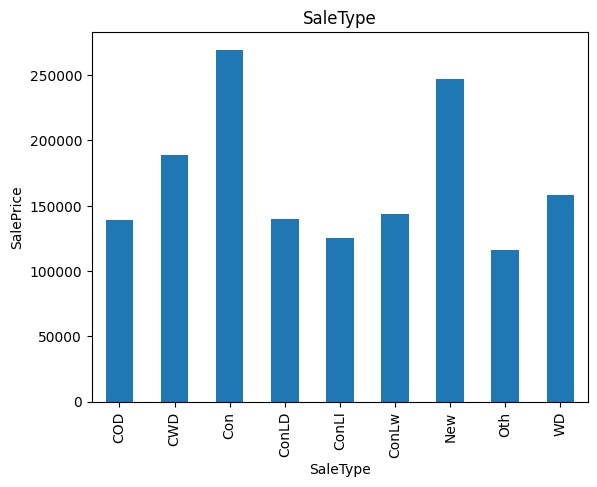

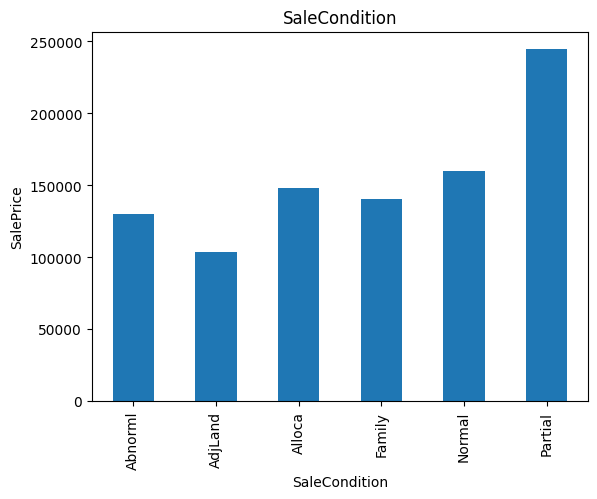

In [ ]:
for feature in categorical_feature:
  data=dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()